# A study on global suicide rates and the various socio-economic and political factors that affect it

Authors:
   - Betül Yurtman
   - Sagar Kumar

Abstract: *"Executive Summary. For the final version: Write an executive summary here. Write it when you are mostly finished with the main report. It should summarize the question, with what data and how you answer it, and what the result is."*

## Introduction

Suicide is a complex global problem that affects numerous individuals, families and communities. It is often a leading cause of preventable deaths globally and is usually influenced by a mix of personal, socio-economic, and govermental factors. In order to garner efficient and effective public health policies, it is important to understand the driving factors for high and low suicide rates. 

This report will delve into global suicide rates and how they differ across various countries, years and genders. We will explore the complex relationship between suicide rates and socio-economic factors like GDP per capita, literacy rate, unemployment rate, political stability and more.  This report will be guided by three leading questions:

	1. How do suicide rates differ across various countries, time and gender?
	2. What roles do GDP per capita, literacy rates and unemployment play in influencing suicide rates globally?
	3. How do socio-economic and governance factors correlate with suicide rates?

The raw data was collected from the World Bank DataBank. The databases used were Gender Statistics and Environment Social and Governance (ESG). The Gender Statistics dataset includes variables like Population, GDP per capita, Human Capital Index (HCI), suicide and literacy rate and more. The ESG dataset includes further values like the Economic and Social Right performance score, unemployment rate, political stability and more. We combined the data based on the country and year and applied some pre-processing in order to be able to handle and analyze the data better.

For the prediction part, we will create a prediction model using years 2010-2018 as training set and predict the Suicide Rates for year 2019 and evaluate the performance of the model, lastly we will apply hyperparameter tuning.

In [31]:
# Necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Performance evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import cross_val_score
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 1500)

## Data

In this section, we will import the datasets. We customized our datasets on [World Bank DataBank ](https://databank.worldbank.org/source/).

We used 2 databases:
 - Gender Statistics
 - Environment Social and Governance

The years we chose are between 2010 and 2019.

The information on Population, GDP, Inflation, HCI, Suicide Rates and Literacy Rates are from **Gender Statistics**.

The information on Economic and Social Rights, Voice and Accountability, Unemployment, School enrollment(primary), Access to clean fuels and technologies for cooking, Government Effectiveness, Political Stability and Absence of Violence/Terrorism, Strength of legal rights index are from **Environment Social and Governance**.

We combined 2 datasets on Year and Country. 

In [32]:
# Import Datasets
# gs = Gender Statistics
data_gs_ = pd.read_excel("Datasets/P_Data_Extract_From_Gender_Statistics.xlsx")
# esg = Environment Social and Governance
data_esg_ = pd.read_excel("Datasets/P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data.xlsx")

In [33]:
# We wil use the copy of the dataset to be able to read the dataset from the file just once.
# If we want to go back to the original version of the dataset, we can just run this part. 
data_gs = data_gs_.copy()
data_esg = data_esg_.copy()

In [34]:
data_gs

,Time,Time Code,Country Name,Country Code,"Population, female [SP.POP.TOTL.FE.IN]","Population, male [SP.POP.TOTL.MA.IN]","Population, total [SP.POP.TOTL]",GDP (current US$) [NY.GDP.MKTP.CD],GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Human Capital Index (HCI) (scale 0-1) [HD.HCI.OVRL],"Human Capital Index (HCI), Male (scale 0-1) [HD.HCI.OVRL.MA]","Human Capital Index (HCI), Female (scale 0-1) [HD.HCI.OVRL.FE]","Suicide mortality rate (per 100,000 population) [SH.STA.SUIC.P5]","Suicide mortality rate, female (per 100,000 female population) [SH.STA.SUIC.FE.P5]","Suicide mortality rate, male (per 100,000 male population) [SH.STA.SUIC.MA.P5]","Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]","Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]"
0,2014,YR2014,Afghanistan,AFG,16172321.0,16543889.0,32716210.0,20497128555.697231,576.487817,4.673996,..,..,..,3.9,3.6,4.2,..,..,..
1,2014,YR2014,Albania,ALB,1439863.0,1449241.0,2889104.0,13228147516.116798,3855.760744,1.625865,..,..,..,5,3.2,6.6,..,..,..
2,2014,YR2014,Algeria,DZA,19004433.0,19755734.0,38760168.0,238942664192.589996,4687.288575,2.916927,..,..,..,2.8,2,3.5,..,..,..
3,2014,YR2014,American Samoa,ASM,26017.0,26199.0,52217.0,643000000,12494.980211,..,..,..,..,..,..,..,..,..,..
4,2014,YR2014,Andorra,AND,35473.0,36148.0,71621.0,3271685596.663211,38402.649261,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2173,Data from database: Gender Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gender Statistics dataset also shows us the information on genders for Population, Suicide Rates, HCI and Literacy Rates.

In [35]:
data_esg

,Time,Time Code,Country Name,Country Code,Economic and Social Rights Performance Score [SD.ESR.PERF.XQ],Voice and Accountability: Estimate [VA.EST],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","School enrollment, primary (% gross) [SE.PRM.ENRR]",Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],Government Effectiveness: Estimate [GE.EST],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ]
0,2010,YR2010,Afghanistan,AFG,1.76468,-1.404467,7.921,102.903442,19.7,-1.478316,-2.579152,..
1,2010,YR2010,Albania,ALB,2.273091,0.123838,14.09,108.494461,65.8,-0.279453,-0.191483,..
2,2010,YR2010,Algeria,DZA,2.284476,-1.022331,9.96,113.377953,99.2,-0.395902,-1.259368,..
3,2010,YR2010,Andorra,AND,..,1.324308,..,90.115562,100,1.512716,1.278272,..
4,2010,YR2010,Angola,AGO,1.428207,-1.120525,16.551,111.872879,44.7,-1.138268,-0.226182,..
...,...,...,...,...,...,...,...,...,...,...,...,...
1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933,Data from database: Environment Social and Gov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some empty rows and information on datasets at the end, we need to remove these rows.

In [36]:
# Remove the last 5 rows from both datasets, there are some empty rows and explanations about datasets at the end.
data_gs = data_gs.iloc[:-5, :]  # Exclude the last 5 rows
data_esg = data_esg.iloc[:-5, :]  # Exclude the last 5 rows

**Merging Datasets**

In [37]:
# Merging the two datasets.
data = pd.merge(
    data_gs,
    data_esg,
    on=["Country Name", "Time"],
    how="inner"
)

# Drop duplicate columns
columns_to_drop = ["Time Code_x", "Time Code_y", "Country Code_x", "Country Code_y"]
data.drop(columns=columns_to_drop, inplace=True)

**Changing/Shortening the Column Names**

In [38]:
# Column names and new names
column_mapping = {
    "Population, female [SP.POP.TOTL.FE.IN]": "Female Population",
    "Population, male [SP.POP.TOTL.MA.IN]": "Male Population",
    "Population, total [SP.POP.TOTL]": "Total Population",
    "GDP (current US$) [NY.GDP.MKTP.CD]": "GDP (Current US$)",
    "GDP per capita (constant 2010 US$) [NY.GDP.PCAP.KD]": "GDP per Capita (2010 US$)",
    "Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]": "Inflation (Annual %)",
    "Human Capital Index (HCI) (scale 0-1) [HD.HCI.OVRL]": "Human Capital Index",
    "Human Capital Index (HCI), Male (scale 0-1) [HD.HCI.OVRL.MA]": "Human Capital Index (Male)",
    "Human Capital Index (HCI), Female (scale 0-1) [HD.HCI.OVRL.FE]": "Human Capital Index (Female)",
    "Suicide mortality rate (per 100,000 population) [SH.STA.SUIC.P5]": "Suicide Rate (Total)",
    "Suicide mortality rate, female (per 100,000 female population) [SH.STA.SUIC.FE.P5]": "Suicide Rate (Female)",
    "Suicide mortality rate, male (per 100,000 male population) [SH.STA.SUIC.MA.P5]": "Suicide Rate (Male)",
    "Literacy rate, adult female (% of females ages 15 and above) [SE.ADT.LITR.FE.ZS]": "Literacy Rate (Female)",
    "Literacy rate, adult male (% of males ages 15 and above) [SE.ADT.LITR.MA.ZS]": "Literacy Rate (Male)",
    "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]": "Literacy Rate (Total)",
    "Economic and Social Rights Performance Score [SD.ESR.PERF.XQ]": "Economic Rights Score",
    "Voice and Accountability: Estimate [VA.EST]": "Voice and Accountability",
    "Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]": "Unemployment Rate",
    "School enrollment, primary (% gross) [SE.PRM.ENRR]": "Primary School Enrollment",
    "Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]": "Clean Fuel Access",
    "Government Effectiveness: Estimate [GE.EST]": "Government Effectiveness",
    "Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]": "Political Stability",
    "Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ]": "Legal Rights Index"
}

# Renaming columns using the dictionary.
data.rename(columns=column_mapping, inplace=True)

**Fixing the Order of the Columns**

In [39]:
# This part is for reproducibility. If someone downloads the data in a different column order, this way they will have the same column order with the report.
# We can also use this part to drop some columns. We dropped Country Code and Time Code here.
fixed_order = [
    "Time",
    "Country Name",
    "Female Population",
    "Male Population",
    "Total Population",
    "GDP (Current US$)",
    "GDP per Capita (2010 US$)",
    "Inflation (Annual %)",
    "Human Capital Index",
    "Human Capital Index (Male)",
    "Human Capital Index (Female)",
    "Suicide Rate (Total)",
    "Suicide Rate (Female)",
    "Suicide Rate (Male)",
    "Literacy Rate (Female)",
    "Literacy Rate (Male)",
    "Literacy Rate (Total)",
    "Primary School Enrollment",
    "Unemployment Rate",
    "Economic Rights Score",
    "Legal Rights Index",
    "Voice and Accountability",
    "Clean Fuel Access",
    "Government Effectiveness",
    "Political Stability",
]

data = data[fixed_order]

data.head()

,Time,Country Name,Female Population,Male Population,Total Population,GDP (Current US$),GDP per Capita (2010 US$),Inflation (Annual %),Human Capital Index,Human Capital Index (Male),Human Capital Index (Female),Suicide Rate (Total),Suicide Rate (Female),Suicide Rate (Male),Literacy Rate (Female),Literacy Rate (Male),Literacy Rate (Total),Primary School Enrollment,Unemployment Rate,Economic Rights Score,Legal Rights Index,Voice and Accountability,Clean Fuel Access,Government Effectiveness,Political Stability
0,2014,Afghanistan,16172321.0,16543889.0,32716210.0,20497128555.697231,576.487817,4.673996,..,..,..,3.9,3.6,4.2,..,..,..,109.115517,7.91,1.943449,9,-1.13544,25.7,-1.359305,-2.411068
1,2014,Albania,1439863.0,1449241.0,2889104.0,13228147516.116798,3855.760744,1.625865,..,..,..,5,3.2,6.6,..,..,..,114.04332,18.05,2.340072,6,0.143777,74.4,-0.048918,0.485986
2,2014,Algeria,19004433.0,19755734.0,38760168.0,238942664192.589996,4687.288575,2.916927,..,..,..,2.8,2,3.5,..,..,..,111.686699,10.21,2.312768,2,-0.813358,99.5,-0.339202,-1.190535
3,2014,Andorra,35473.0,36148.0,71621.0,3271685596.663211,38402.649261,..,..,..,..,..,..,..,..,..,..,88.235291,..,..,..,1.165965,100,1.712283,1.286593
4,2014,Angola,13746371.0,13381965.0,27128337.0,135966802586.713196,3304.681148,7.280387,..,..,..,6.4,2.4,10.4,53.407211,79.974152,66.030113,..,16.317,1.565973,1,-1.14523,46.7,-1.055904,-0.333232


**Dataset Overview**

In [40]:
# Dataset Overview to analyse the data types, shape of the dataset and unique value count for each variable. 
def dataset_overview(dataframe):
    """
    Generates a summary of the dataset, including:
    - Total number of rows and columns / Shape of the dataset
    - Unique values per column
    - Data types for each column
    """
    # Shape of the dataset
    rows_columns = dataframe.shape
    # Unique value count for each variable
    unique_counts = dataframe.nunique()
    # Datatypes
    data_types = dataframe.dtypes
    
    # DataFrame for the results
    overview = pd.DataFrame({
        "Unique Values": unique_counts,
        "Data Type": data_types
    })
    
    print(f"Shape: {rows_columns}")
    return overview

overview = dataset_overview(data)

overview

Shape: (1930, 25)


,Unique Values,Data Type
Time,10,object
Country Name,193,object
Female Population,1927,float64
Male Population,1929,float64
Total Population,1930,float64
GDP (Current US$),1903,object
GDP per Capita (2010 US$),1887,object
Inflation (Annual %),1774,object
Human Capital Index,398,object
Human Capital Index (Male),347,object


Besides Country Name, the data types should be numerical.

**Converting Numerical Columns**

In [41]:
# Converting numerical columns
columns_to_convert = [
    "GDP (Current US$)", "GDP per Capita (2010 US$)", "Inflation (Annual %)",
    "Human Capital Index", "Human Capital Index (Male)", "Human Capital Index (Female)",
    "Suicide Rate (Total)", "Suicide Rate (Female)", "Suicide Rate (Male)",
    "Literacy Rate (Female)", "Literacy Rate (Male)", "Literacy Rate (Total)",
    "Economic Rights Score", "Unemployment Rate", "Primary School Enrollment",
    "Clean Fuel Access", "Government Effectiveness", "Political Stability", "Legal Rights Index",
    "Voice and Accountability"
]

for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

**Filling Missing Values**

In [42]:
# Missing value analysis - Sorted by missing values
def missing_value_summary(dataframe):
    """
    Generates a summary of missing values for the DataFrame.
    Returns a DataFrame showing the total missing values and percentage of missing values for each column.
    """
    # Total missing value count
    missing_counts = dataframe.isna().sum()
    # The ratio of missing values ​​to the total data set
    missing_percent = (missing_counts / len(dataframe)) * 100
    # DataFrame for the results
    missing_summary = pd.DataFrame({
        "Missing Values": missing_counts,
        "Percentage (%)": missing_percent
    })
    # Exclude columns with no missing values ​​and sort by missing values
    missing_summary = missing_summary[missing_summary["Missing Values"] > 0].sort_values(by="Missing Values", ascending=False)

    return missing_summary

missing_summary = missing_value_summary(data)

# Table for missing values
missing_summary

,Missing Values,Percentage (%)
Human Capital Index (Male),1568,81.243523
Human Capital Index (Female),1567,81.191710
Literacy Rate (Male),1556,80.621762
Literacy Rate (Female),1556,80.621762
Literacy Rate (Total),1556,80.621762
Human Capital Index,1513,78.393782
Legal Rights Index,635,32.901554
Primary School Enrollment,324,16.787565
Economic Rights Score,295,15.284974
Inflation (Annual %),157,8.134715


In [43]:
# Filling missing values with the average value for each country, if they have any non-missing value for the variable.
def fill_missing_values_by_country_mean(dataframe, column, country_column, year_column):
    """
    Fill missing values for a given column using the country-specific mean of the available data.
    If no data is available for a country, the function skips filling.
    """
    for country in dataframe[country_column].unique():
        # Filter data for the specific country
        country_data = dataframe[dataframe[country_column] == country]
        # Check if the column has at least one non-missing value for the country
        if not country_data[column].isna().all():
            mean_value = country_data[column].mean()
            # Fill missing values for that country with the mean value
            dataframe.loc[
                (dataframe[country_column] == country) & (dataframe[column].isna()),
                column
            ] = mean_value
        #else 
            # We can use this part to fill the missing values for the countries that has no non-missing value for the variables.

# Define which columns to fill
columns_to_fill = [
    "GDP (Current US$)", "GDP per Capita (2010 US$)", "Inflation (Annual %)",
    "Human Capital Index", "Human Capital Index (Male)", "Human Capital Index (Female)",
    "Suicide Rate (Total)", "Suicide Rate (Female)", "Suicide Rate (Male)",
    "Literacy Rate (Female)", "Literacy Rate (Male)", "Literacy Rate (Total)",
    "Economic Rights Score", "Unemployment Rate", "Primary School Enrollment",
    "Clean Fuel Access", "Government Effectiveness", "Political Stability", "Legal Rights Index"
]

# Fill missing values
for col in columns_to_fill:
    fill_missing_values_by_country_mean(data, col, country_column="Country Name", year_column="Time")

data.head()

,Time,Country Name,Female Population,Male Population,Total Population,GDP (Current US$),GDP per Capita (2010 US$),Inflation (Annual %),Human Capital Index,Human Capital Index (Male),Human Capital Index (Female),Suicide Rate (Total),Suicide Rate (Female),Suicide Rate (Male),Literacy Rate (Female),Literacy Rate (Male),Literacy Rate (Total),Primary School Enrollment,Unemployment Rate,Economic Rights Score,Legal Rights Index,Voice and Accountability,Clean Fuel Access,Government Effectiveness,Political Stability
0,2014,Afghanistan,16172321.0,16543889.0,32716210.0,2.049713e+10,576.487817,4.673996,0.391245,0.400011,0.363431,3.9,3.6,4.2,17.017839,45.417099,31.448851,109.115517,7.910,1.943449,9.0,-1.135440,25.7,-1.359305,-2.411068
1,2014,Albania,1439863.0,1449241.0,2889104.0,1.322815e+10,3855.760744,1.625865,0.597756,0.576212,0.621578,5.0,3.2,6.6,95.913776,98.180386,97.046135,114.043320,18.050,2.340072,6.0,0.143777,74.4,-0.048918,0.485986
2,2014,Algeria,19004433.0,19755734.0,38760168.0,2.389427e+11,4687.288575,2.916927,0.528759,0.512211,0.546662,2.8,2.0,3.5,75.322968,87.422958,81.407837,111.686699,10.210,2.312768,2.0,-0.813358,99.5,-0.339202,-1.190535
3,2014,Andorra,35473.0,36148.0,71621.0,3.271686e+09,38402.649261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.235291,NaN,NaN,NaN,1.165965,100.0,1.712283,1.286593
4,2014,Angola,13746371.0,13381965.0,27128337.0,1.359668e+11,3304.681148,7.280387,0.360595,0.365902,0.355888,6.4,2.4,10.4,53.407211,79.974152,66.030113,112.516214,16.317,1.565973,1.0,-1.145230,46.7,-1.055904,-0.333232


There are still some NaN values, this shows us that the country(for example Andorra) has no value for all 10 years for that variables.

In [44]:
# Let's see the variables that still has missing data.
missing_summary = missing_value_summary(data)

# Table for missing values
missing_summary

,Missing Values,Percentage (%)
Literacy Rate (Female),550,28.497409
Literacy Rate (Male),550,28.497409
Literacy Rate (Total),550,28.497409
Human Capital Index (Male),400,20.725389
Human Capital Index (Female),400,20.725389
Human Capital Index,300,15.544041
Unemployment Rate,150,7.772021
Economic Rights Score,110,5.699482
Inflation (Annual %),100,5.181347
Suicide Rate (Total),100,5.181347


**Including the continents using "Country Name" column.**

In [45]:
# Creating a dictionary by grouping the Countries by Continents.
continent_mapping = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde",
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo, Dem. Rep.",
        "Congo, Rep.", "Djibouti", "Egypt, Arab Rep.", "Equatorial Guinea", "Eritrea",
        "Eswatini", "Ethiopia", "Gabon", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau",
        "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
        "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger",
        "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
        "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe",
        "Cote d'Ivoire", "Sao Tome and Principe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei Darussalam",
        "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran, Islamic Rep.",
        "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyz Republic", "Lao PDR",
        "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan",
        "Philippines", "Qatar", "Saudi Arabia", "Singapore", "Sri Lanka", "Syrian Arab Republic",
        "Tajikistan", "Thailand", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Viet Nam",
        "West Bank and Gaza", "Yemen, Rep.", "Korea, Rep.", "Hong Kong SAR, China", "Macao SAR, China",
        "Timor-Leste"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
        "Croatia", "Czechia", "Denmark", "Estonia", "Faroe Islands", "Finland", "France", "Germany",
        "Gibraltar", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russian Federation",
        "San Marino", "Serbia", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland",
        "Turkiye", "Ukraine", "United Kingdom", "Isle of Man"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas, The", "Barbados", "Belize", "Bermuda", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti",
        "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Puerto Rico", "St. Kitts and Nevis",
        "St. Lucia", "St. Vincent and the Grenadines", "Trinidad and Tobago", "United States",
        "Virgin Islands (U.S.)", "Cayman Islands", "British Virgin Islands", "St. Martin (French part)",
        "Greenland", "Sint Maarten (Dutch part)", "Turks and Caicos Islands"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay",
        "Peru", "Suriname", "Uruguay", "Venezuela, RB", "Curacao", "Aruba"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia, Fed. Sts.", "Nauru",
        "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu",
        "Vanuatu", "American Samoa", "New Caledonia", "French Polynesia", "Guam", "Northern Mariana Islands"
    ]
}

# Flatten the continent mapping for easier access
country_to_continent = {
    country: continent
    for continent, countries in continent_mapping.items()
    for country in countries
}

# Map countries to continents
data['Continent'] = data['Country Name'].map(country_to_continent)
data[['Country Name', 'Continent']].head()

,Country Name,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


## Analysis and Predictions



### Question 1: How do suicide rates differ across various countries, time and gender?
Analyzing and understanding how suicide rates vary across countries, time and gender is key to finding regions and populations at greater risk, enabling targeted mental and physical health solutions. Examining gender disparities gives us an insight into the societal, cultural, and economic factors that disproportionately affect males and females, forming a basis for more inclusive and effective suicide prevention strategies.
We start our analysis by taking a wider and more general approach by first taking a closer look at the relationship between suicide rates over time, across genders and continents. 

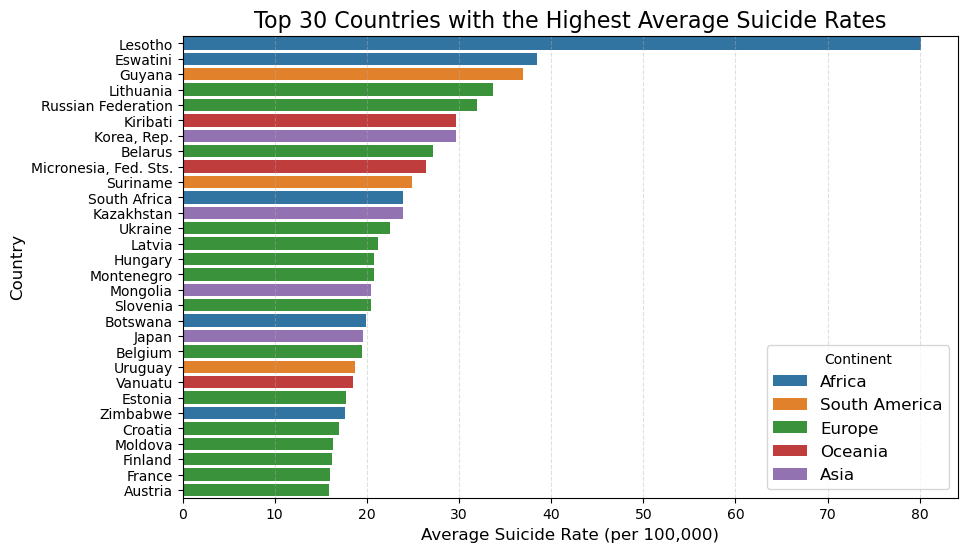

In [46]:
# get average suicide rate and group by name and continent
average_suicide_rate = data.groupby(["Country Name", "Continent"])["Suicide Rate (Total)"].mean().reset_index()

# sort by highest average rate and extract top 30
top_countries = average_suicide_rate.sort_values(by="Suicide Rate (Total)", ascending=False).head(30)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_countries, 
    x="Suicide Rate (Total)", 
    y="Country Name", 
    hue="Continent", 
    dodge=False
)

plt.title("Top 30 Countries with the Highest Average Suicide Rates", fontsize=16)
plt.xlabel("Average Suicide Rate (per 100,000)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title="Continent", fontsize=12, loc='lower right')
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()

We start by plotting a histogram of the top 30 countries with the highest average suicide rate, colored by continent. Eswatini, Guyana, Lithuania have the highest average suicide rates with Lesotho far and above the highest globally. In terms of continents, we have 15 from Europe, 5 from Africa, 3 from South America,  3 from Oceania and 4 from Asia. The distribution shows the high degree of variety among the highest ranks but Europe stands out with half the entries. We will start to build a better understanding of the varying suicide rates amongst countires as we explore the dataset further.

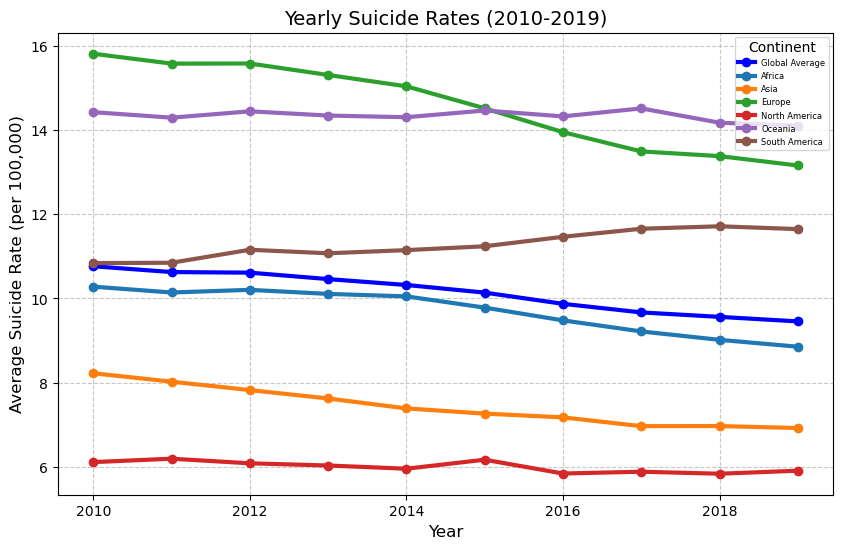

In [47]:
# get suicide rates by year and continent
yearly_continent_suicide_rate = data.groupby(["Time", "Continent"])["Suicide Rate (Total)"].mean().reset_index()

# get suicide rates global
yearly_suicide_rate = data.groupby("Time")["Suicide Rate (Total)"].mean()

plt.figure(figsize=(10, 6))

# global average
plt.plot(yearly_suicide_rate.index, yearly_suicide_rate.values, marker="o", label="Global Average", color="blue", linewidth=3)

# continent average
for continent in yearly_continent_suicide_rate["Continent"].unique():
    continent_data = yearly_continent_suicide_rate[yearly_continent_suicide_rate["Continent"] == continent]
    plt.plot(continent_data["Time"], continent_data["Suicide Rate (Total)"], marker="o", label=continent, linewidth=3)

# plot
plt.title("Yearly Suicide Rates (2010-2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Suicide Rate (per 100,000)", fontsize=12)
plt.legend(title="Continent", fontsize=6)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

The line plot shows the yearly average suicide rates globally per continent over the ten year period from 2010 to 2019. Globally, we observe a gradual decrease in suicide rates with the global average in 2010 at 10.76 down to 9.46 in 2019. This could be due to a couple of reasons like global awareness and interventions world-wide. Over the time span, the average suicide rate for continents like Europe, Africa and Asia have decreased but Europe still exhibits some of the higest suicide rates in the world. The suicide rate for continents like North America and Oceania havn't changed much over the years however South America is the only continent with higher averages than compared to ten years ago.

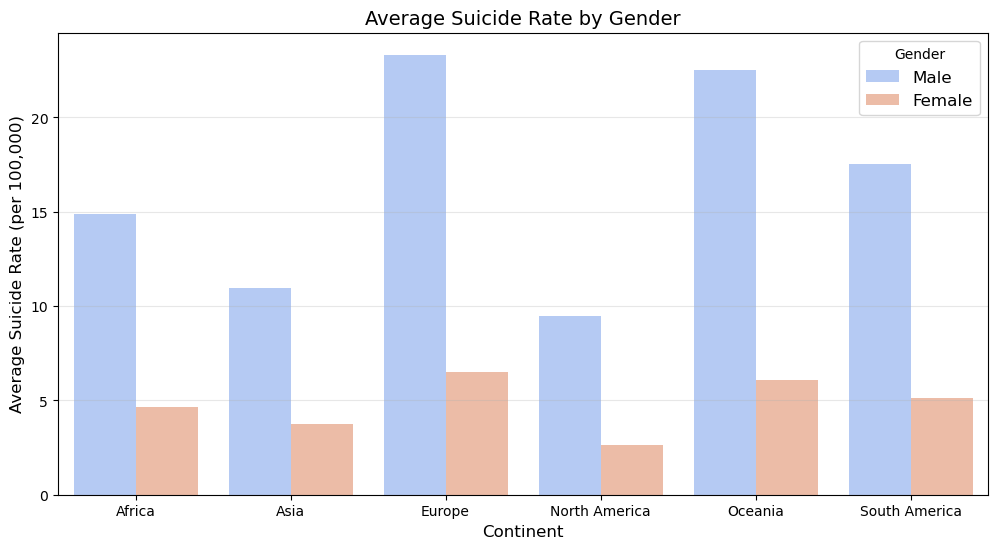

In [48]:
# get male/female average suicide rates per continent
gender_continent_suicide_rates = data.groupby("Continent")[["Suicide Rate (Male)", "Suicide Rate (Female)"]].mean().reset_index()

# reshape table
gender_continent_suicide_df = gender_continent_suicide_rates.melt(
    id_vars="Continent",
    value_vars=["Suicide Rate (Male)", "Suicide Rate (Female)"],
    var_name="Gender",
    value_name="Avg Suicide Rate"
)

# cleanup: "Suicide Rate (Male)" -> "Male"
gender_continent_suicide_df["Gender"] = gender_continent_suicide_df["Gender"].str.replace("Suicide Rate (", "").str.replace(")", "")

# plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_continent_suicide_df,
    x="Continent",
    y="Avg Suicide Rate",
    hue="Gender",
    palette="coolwarm"
)
plt.title("Average Suicide Rate by Gender", fontsize=14)
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Average Suicide Rate (per 100,000)", fontsize=12)
plt.legend(title="Gender", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

The following bar chart compares the average suicide rates per Gender (Male and Female) per continent. It gives us an overview of the disparities between each gender suicide rate at a glance. The most obvious conclusion we can take away from this chart is that males are usually at a higher risk of suicide than females. We observe that Europe and Oceania share the same gender characteristics with a high proportion of Male suicides compares to lower rates of Female suicide rates. Whereas in Asia and North America, although the average suicide rate is lower, there is less disparity between male and female compared to the others.

To summarize, the initial high-level surface analysis of our data-set highlights significant regional and gender disparities in suicide rates, with Europe consistently exhibiting the highest rates globally, with male suicide rates surpassing female rates across all continents. These findings emphasize the need to delve deeper into the socio-economic factors that might influence these trends. Up next, we explore how variables such as GDP per capita, literacy rates, and unemployment impact suicide rates globally, providing further insight into the underlying drivers of this complex problem.

### Question 2: What roles do gdp per capita, literacy rates and unemployment play in influencing suicide rates globally?
We now delve deeper into our data-set and investigate the economic state of a country versus its suicide rate. We will look at three specific factors within our data-set, namely, Gdp per capita, literacy rate and unemployment rates. 

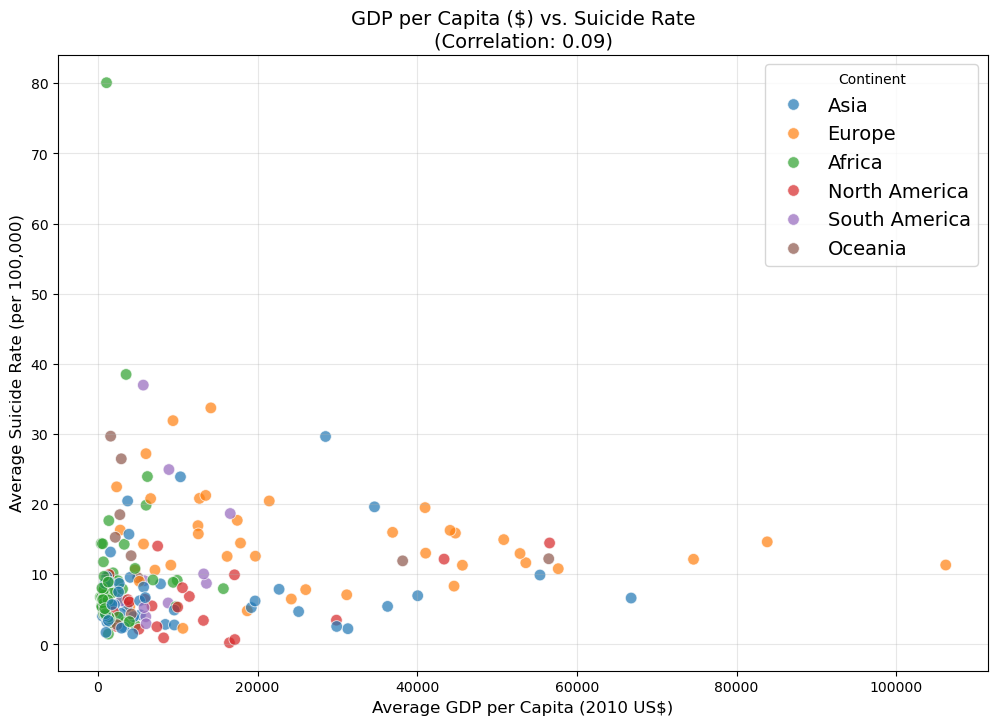

In [49]:
# column names
avg_gdp = "Avg GDP per Capita"
avg_suicide_rate = "Avg Suicide Rate"

# calculate average gdp per capita and suicide rate
economic_health = data.groupby(["Country Name", "Continent"]).agg({
    "GDP per Capita (2010 US$)": "mean",
    "Suicide Rate (Total)": "mean"
}).dropna().reset_index()

# Rename columns
economic_health.columns = ["Country Name", "Continent", avg_gdp, avg_suicide_rate]

# get correlation coefficient
numeric_columns = economic_health[[avg_gdp, avg_suicide_rate]]
correlation = numeric_columns.corr().loc[avg_gdp, avg_suicide_rate]

# plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=economic_health,
    x=avg_gdp,
    y=avg_suicide_rate,
    hue="Continent", 
    s=70,
    alpha=0.7
)
plt.title(f"GDP per Capita ($) vs. Suicide Rate\n(Correlation: {correlation:.2f})", fontsize=14)
plt.xlabel("Average GDP per Capita (2010 US$)", fontsize=12)
plt.ylabel("Average Suicide Rate (per 100,000)", fontsize=12)
plt.legend(title="Continent", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

The following scatter plot shows the relationship between the Average GDP per Capita versus the Average Suicide Rate. We also calculate the correlation coefficient between the two variables which comes out to 0.09 suggesting a weak positive relationship. So we can conclude that GDP alone does not play a significant enough role in order to determine or predict the suicide rates. Although we can still make a few interesting obsevations from the plot. Countries from Asia, Africa and South America are concentrated at left side of the plot due to their low average gdp, but vary widely in terms of suicide rates. Countries from Europe and Oceania show a broad range of gdp and suicide rate values.

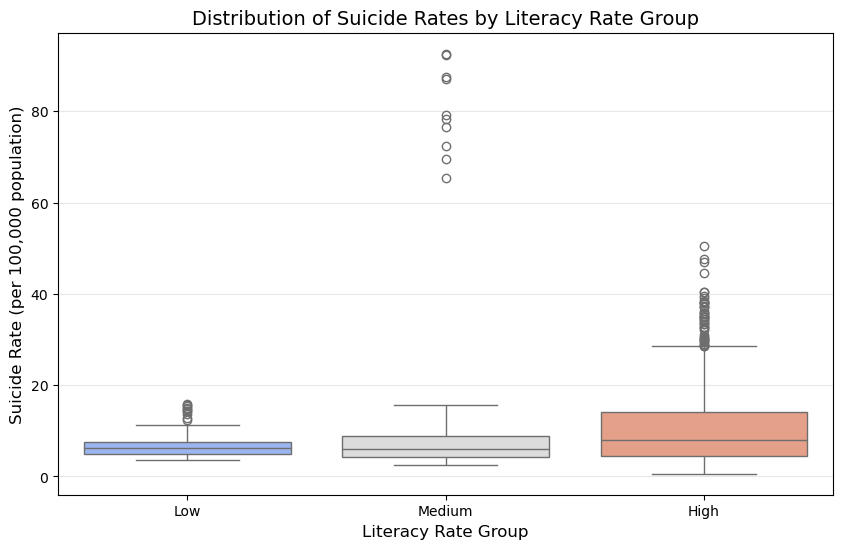

In [50]:
# create literacy rate groups (50, 80, 100)
data["Literacy Group (Total)"] = pd.cut(
    data["Literacy Rate (Total)"], 
    bins=[0, 50, 80, 100], 
    labels=["Low", "Medium", "High"]
)

# plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="Literacy Group (Total)",
    y="Suicide Rate (Total)",
    hue="Literacy Group (Total)",  
    palette="coolwarm",
    legend=False 
)
plt.title("Distribution of Suicide Rates by Literacy Rate Group", fontsize=14)
plt.xlabel("Literacy Rate Group", fontsize=12)
plt.ylabel("Suicide Rate (per 100,000 population)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

To investigate the relationship between literacy rate and average suicide rate we make a box plot and divide literacy rate into three categories; low, medium and high. This will distinguish the suicide rate for countries with three different levels of average competancy. We observe that countries that fall in the low literacy rate group have a small median, with relatively low suicide rates overall but suicide rates are somewhat consistent. This is of contract to the countries with medium and high average literacy rates that exhibit greater variability and outliers. Let's now investigate the relationship between average unemployment and suicide rate.

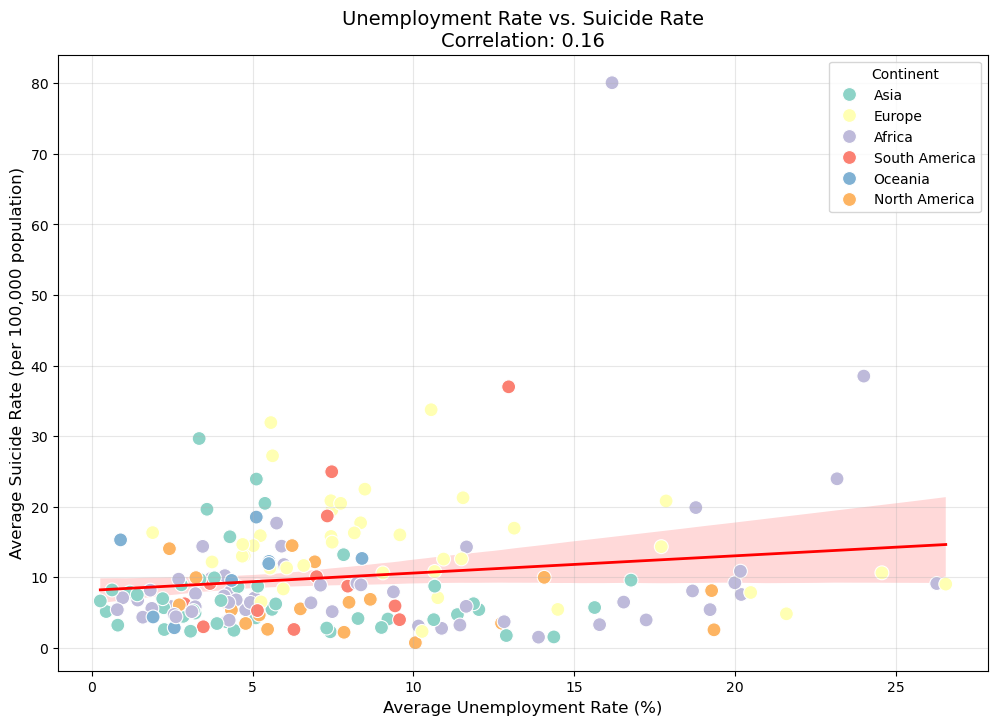

In [51]:
# get unemployment rate per country, continent
unemployment_suicide = data.groupby(["Country Name", "Continent"]).agg({
    "Unemployment Rate": "mean",
    "Suicide Rate (Total)": "mean"
}).dropna().reset_index()

# calculate correlation coefficient
correlation = unemployment_suicide["Unemployment Rate"].corr(unemployment_suicide["Suicide Rate (Total)"])

# plot regression line
plt.figure(figsize=(12, 8))
sns.regplot(
    data=unemployment_suicide, 
    x="Unemployment Rate", 
    y="Suicide Rate (Total)", 
    scatter_kws={"alpha": 0.6}, 
    line_kws={"color": "red", "lw": 2}
)

# plot scatter plot
sns.scatterplot(
    data=unemployment_suicide, 
    x="Unemployment Rate", 
    y="Suicide Rate (Total)", 
    hue="Continent", 
    palette="Set3",
    s=100
)

plt.title(f"Unemployment Rate vs. Suicide Rate\nCorrelation: {correlation:.2f}", fontsize=14)
plt.xlabel("Average Unemployment Rate (%)", fontsize=12)
plt.ylabel("Average Suicide Rate (per 100,000 population)", fontsize=12)
plt.legend(title="Continent", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

The above scatterplot shows the relationship between average unemployment rate vs the average suicide rate for every country. The correlation coefficient is 0.16 weak positive relation. A few observations, firstly it seems that countries with low average unemployment rates, exhibit a wide range of suicides rates - highly suggesting that more socio-economic factors other than unemployment alone play a big role in suicide rates. The regional/continental trends are that Europe and Asia have a wide distribution of suicide rates reflecting diverse economic and cultural conditions. There are also some outliers, such as countries with both high unemployment rates and elevated suicide rates exceeding. This shows cases where unemployment may be a significant contributing factor to high suicide rates.

To conclude, we looked at three variables within our data-set that are related to the 'richness' and 'education' of a country and region, namely Gdp per Capita, unemployment rate and literacy rate. We discovered that the correlation between gdp per capita and suicide rate is 0.09, with countries from Africa, Asia, and South America concentrated at lower GDP levels but exhibiting wide variability in suicide rates. Europe and Oceania display broader ranges in both GDP and suicide rates. In terms of literacy rates, countries with low literacy have lower, more consistent suicide rates, whereas medium and high literacy groups show greater variability and higher outliers. Finally, we found that the correlation between gdp per capita and suicide rate is 0.16. Countries with low unemployment rates display a wide range of suicide rates, emphasizing the role of additional socio-economic or governmental factors.

### Question 3: How do socio-economic and governance factors correlate with suicide rates?
In order to garner more specific mental and social health problems that may lead to suicide, we investigate the relationship between government and economy with suicide rates. We will look at the various different variables in our data-set and apply simple correlations to find the relationship between these factors. We start by making a heatmap of all relevant variables to see their correlation with suicide rates. For our heatmap we will consider Legal Rights Index, Voice and Accountability, Clean Fuel Access, Government Effectiveness, Political Stability and Economic Rights score.

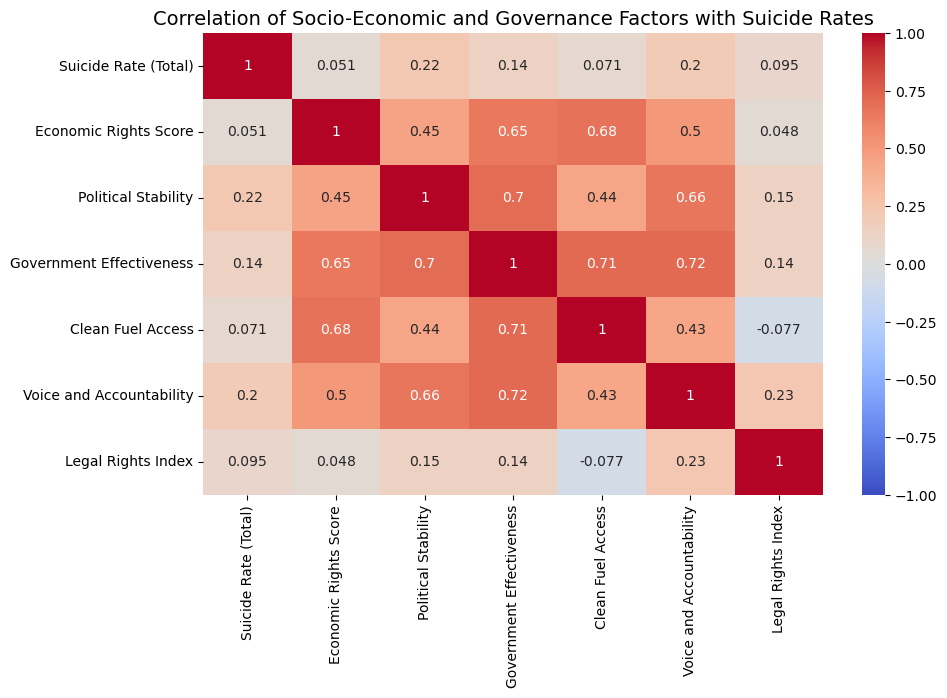

In [52]:
# select relevant columns
socio_governance_factors = data[[
    "Suicide Rate (Total)", 
    "Economic Rights Score",
    "Political Stability", 
    "Government Effectiveness", 
    "Clean Fuel Access", 
    "Voice and Accountability", 
    "Legal Rights Index"
]]

# cleanup - clean values
socio_governance_factors = socio_governance_factors.dropna()

# get correlation matrix
correlation_matrix = socio_governance_factors.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.title("Correlation of Socio-Economic and Governance Factors with Suicide Rates", fontsize=14)
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    vmin=-1, vmax=1 # -1 to +1 scale correlation
)
plt.show()

The following heatmap illustrates the correlation between average suicide rates and various socio-economic and governance factors. Of the factors mentioned, political stability has the highest positve correlation at 0.22, although this is still very low. The lowest correlation is Economic Rights Score at a mere 0.051. This is about what we expected as from our investigation in Question 2 where we discovered that suicide rates have very little correlation with the countries economy. Looking at some of the inter-relationships between our factors, we can clearly see a strong positive relation between clean fuel access and government effectiveness as well as voice and accountability and political stability. This suggests that countries that have access to fuel tend to have a more effective government and countries that have free speech and voice and accountability, also have political stability. 


### **Model Building and Evaluation for Predicting Suicide Rates (2019)**

In this section, we will build a predictive model to estimate suicide rates for the year 2019. The dataset from 2010 to 2018 will be used to train the model, and the year 2019 will be used as the testing set.

We will follow these key steps:

Select Models: We will try three models:
- Random Forest Regressor
- Linear Regression
- Gradient Boosting Regressor

Evaluate Model Performance: Using cross-validation and regression metrics, we will compare the performance of each model.

Hyperparameter Optimization: For the best-performing model, we will perform hyperparameter tuning to improve its performance.

Feature Importance: Finally, we will analyze which features (independent variables) contribute most to predicting suicide rates.

In [53]:
# Dropping some columns that we won't be using for the prediction. 
data.drop(columns = ["Female Population", "Male Population", "Total Population", "GDP (Current US$)", "Human Capital Index (Male)", "Human Capital Index (Female)", "Suicide Rate (Female)", "Suicide Rate (Male)", "Literacy Rate (Female)", "Literacy Rate (Male)"], inplace = True)

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group by 'Continent' and calculate the mean for all numeric variables
data_continents = data.groupby(['Continent', 'Time'], dropna=True).mean(numeric_only=True).reset_index()

# Fill missing values with the continent's mean
# Group by 'Continent' and calculate the mean for numeric columns
continent_means = data.groupby('Continent')[numeric_columns].transform('mean')

# Replace NaN values in numeric columns with continent-specific means
data[numeric_columns] = data[numeric_columns].where(data[numeric_columns].notna(), continent_means)

# Handle any remaining NaN values
# Replace remaining NaNs with the global mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

Three regression models will be used and the model with the best performance will be selected.

In [54]:
# Select features and the target value.

# Selecting variables other than 'Suicide Rate' as our feature variables.
# We excluded 'Total Population' because that is not an affect on the 'Suicide Rates'.
features = [
    'GDP per Capita (2010 US$)', 'Inflation (Annual %)', 
    'Human Capital Index', 'Literacy Rate (Total)', 'Primary School Enrollment', 
    'Unemployment Rate', 'Economic Rights Score', 'Legal Rights Index', 
    'Voice and Accountability', 'Clean Fuel Access', 'Government Effectiveness', 
    'Political Stability'
]

# Selecting 'Suicide Rate' as our target variable.
target = 'Suicide Rate (Total)'

# Separate training (2010-2018) and testing (2019) data
train_data = data[(data['Time'] >= 2010) & (data['Time'] <= 2018)]
test_data = data[(data['Time'] == 2019)]

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()
gb_model = GradientBoostingRegressor(random_state=42)

# Cross-validation function
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -1 * scores.mean()  # Return positive MSE

# Train/test split for entire data
X = train_data[features]
y = train_data[target]
X_test_final = test_data[features]
y_test_final = test_data[target]

# Compare models
rf_score = evaluate_model(rf_model, X, y)
lr_score = evaluate_model(lr_model, X, y)
gb_score = evaluate_model(gb_model, X, y)

print(f"Random Forest Cross-Validation MSE: {rf_score:.4f}")
print(f"Linear Regression Cross-Validation MSE: {lr_score:.4f}")
print(f"Gradient Boosting Cross-Validation MSE: {gb_score:.4f}")

Random Forest Cross-Validation MSE: 14.5881
Linear Regression Cross-Validation MSE: 65.4337
Gradient Boosting Cross-Validation MSE: 17.7464


Comparing the MSE scores, we see that Random Forest has the lowest MSE score. We will continue with Random Forest.

**Hyperparameter Tuning**

In [55]:
# Define parameter grid
# We tried different parameters but we just left the best parameters here because of the calculation time.
param_grid = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X, y)

# Train model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X, y)
y_pred_final = best_rf_model.predict(X_test_final)

# Final MSE and MAE
final_mse = mean_squared_error(y_test_final, y_pred_final)
final_mae = mean_absolute_error(y_test_final, y_pred_final)
print(f"Final Test MSE: {final_mse:.4f}, Final Test MAE: {final_mae:.4f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Final Test MSE: 3.2788, Final Test MAE: 1.1341


**Feature Importance**

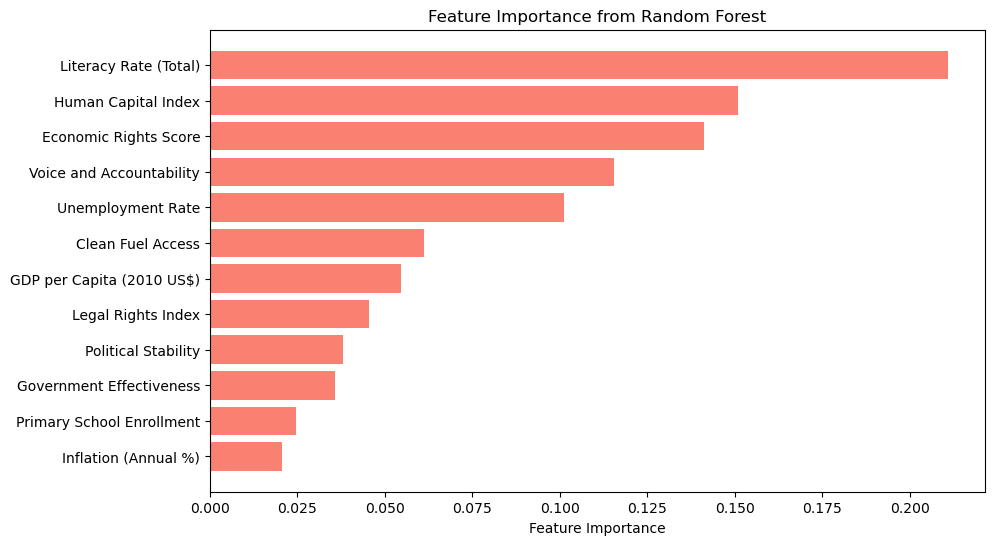

In [56]:
# Feature importance from Random Forest
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

Feature Importance graph that is generated from the Random Forest model shows critical information on the significance of each variable in predicting Suicide Rates. The Random Forest model assigns the highest importance to the Literacy Rate, this indicates that Literacy Rates are a critical determinant for estimating Suicide Rates. This is followed by the Human Capital Index, which reflects factors like education and health, emphasizing its strong correlation with societal well-being and mental health outcomes. The Economic Rights Score is also ranked among the top 3 contributors, underscoring the role of economic stability and rights in influencing suicide rates. 

Middle-ranking variables such as Unemployment Rate and Voice and Accountability indicate a moderate influence, highlighting their potential role in capturing societal and governance-related effects on suicide rates.

On the other hand, variables like Inflation (Annual %) and Primary School Enrollment are identified as the least impactful. This suggests that while these factors may have some influence, their predictive power in this context is relatively limited compared to other features. 

These values could be used to eliminate some features by using a threshold. After our trials, the results showed that the model performs best when all the variables are included.

In [57]:
# Filter out less important features
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Retrain with selected features
X_selected = X[selected_features]
X_test_selected = X_test_final[selected_features]
best_rf_model.fit(X_selected, y)
y_pred_selected = best_rf_model.predict(X_test_selected)

# Evaluate new model
mse_selected = mean_squared_error(y_test_final, y_pred_selected)
print(f"Test MSE after feature selection: {mse_selected:.4f}")

Test MSE after feature selection: 2.9514


We kept the threshold as 0.01, which means we did not changed the features. Fitting the model again, gave better results, that is why we kept this part.

**Visualising Actual and Predicted Values**

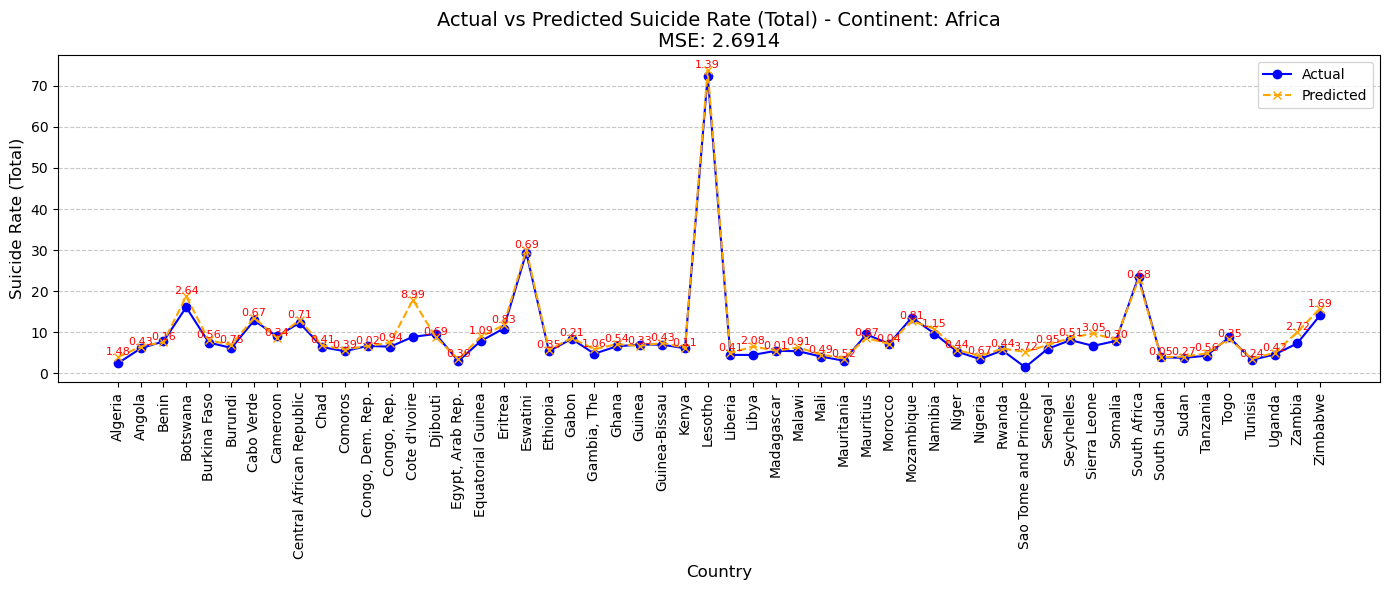

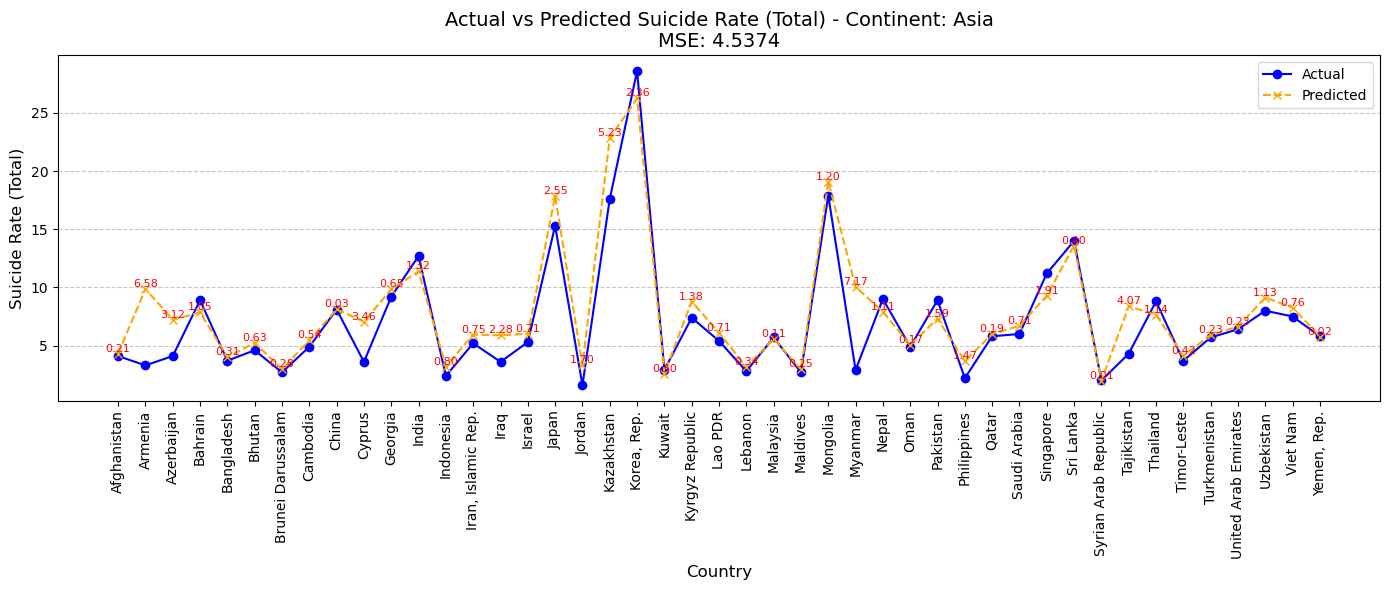

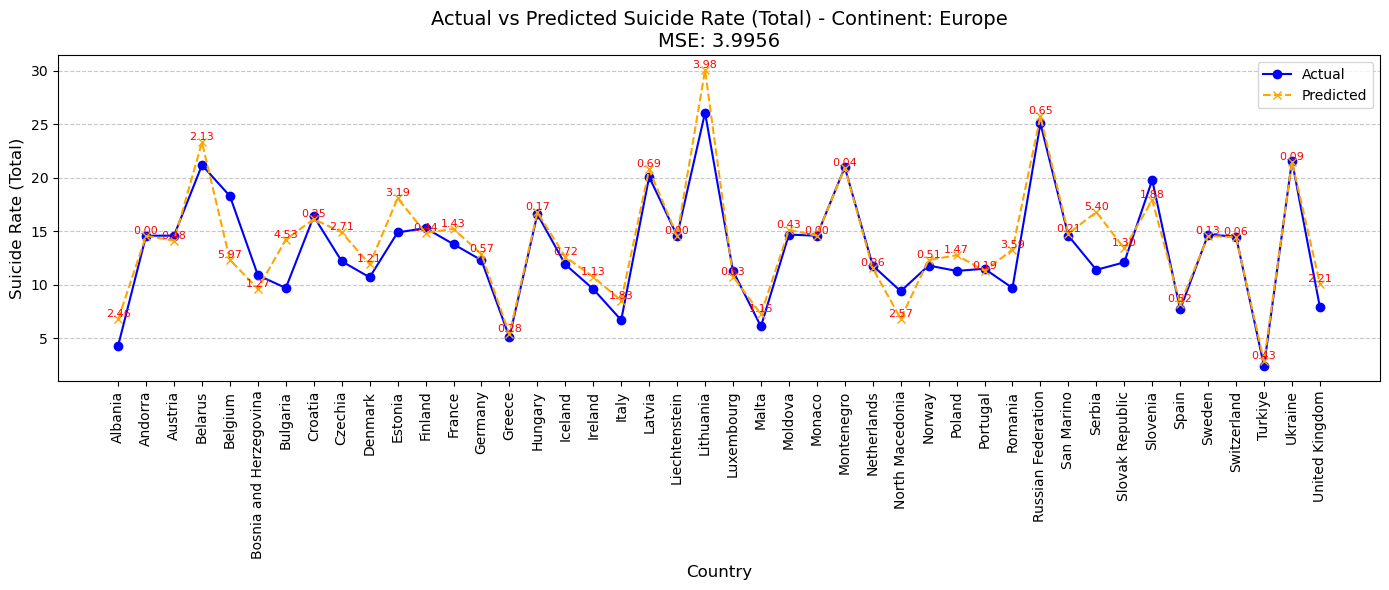

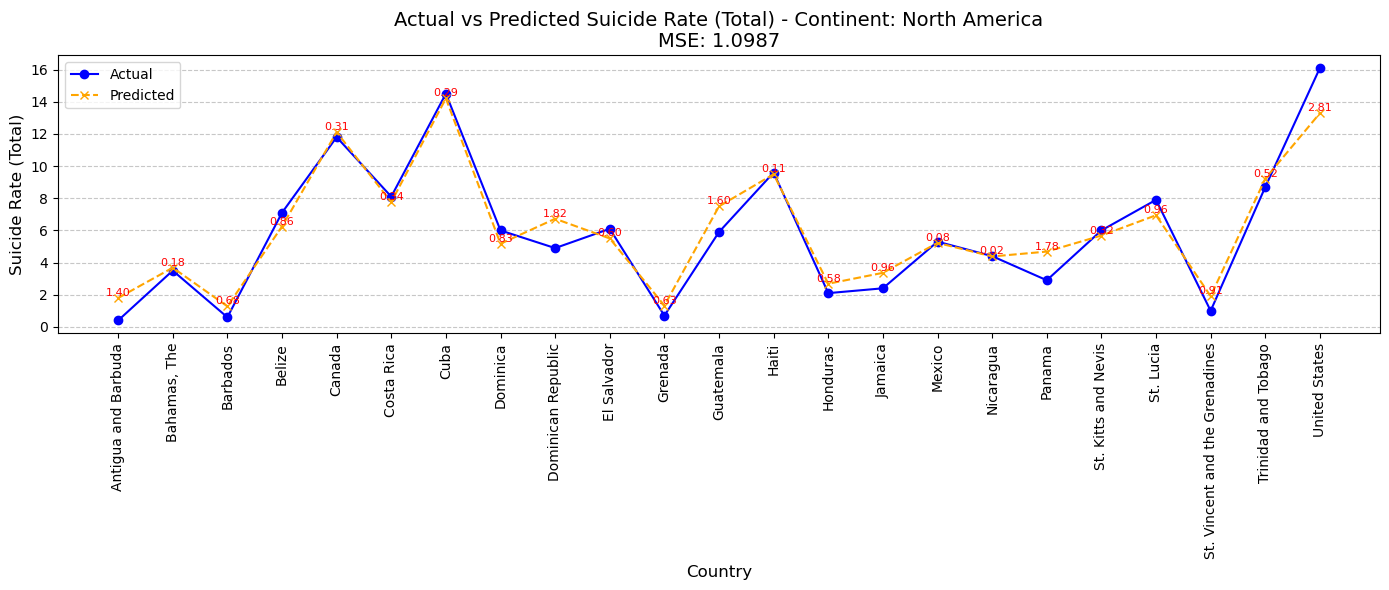

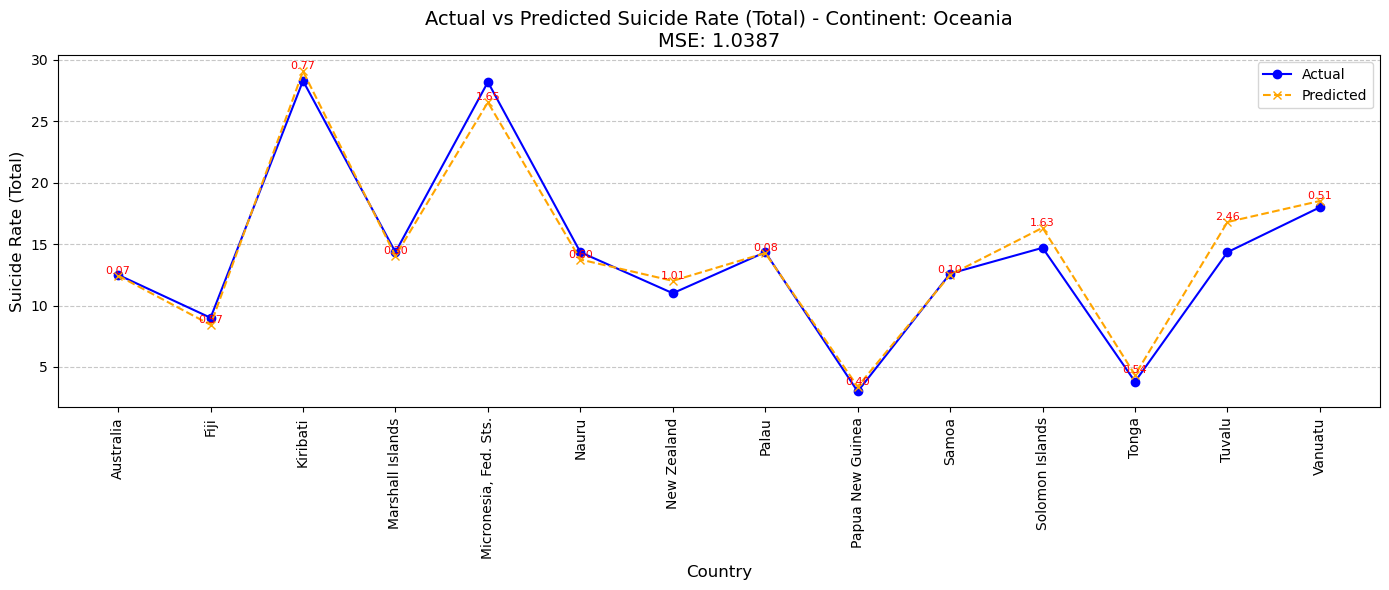

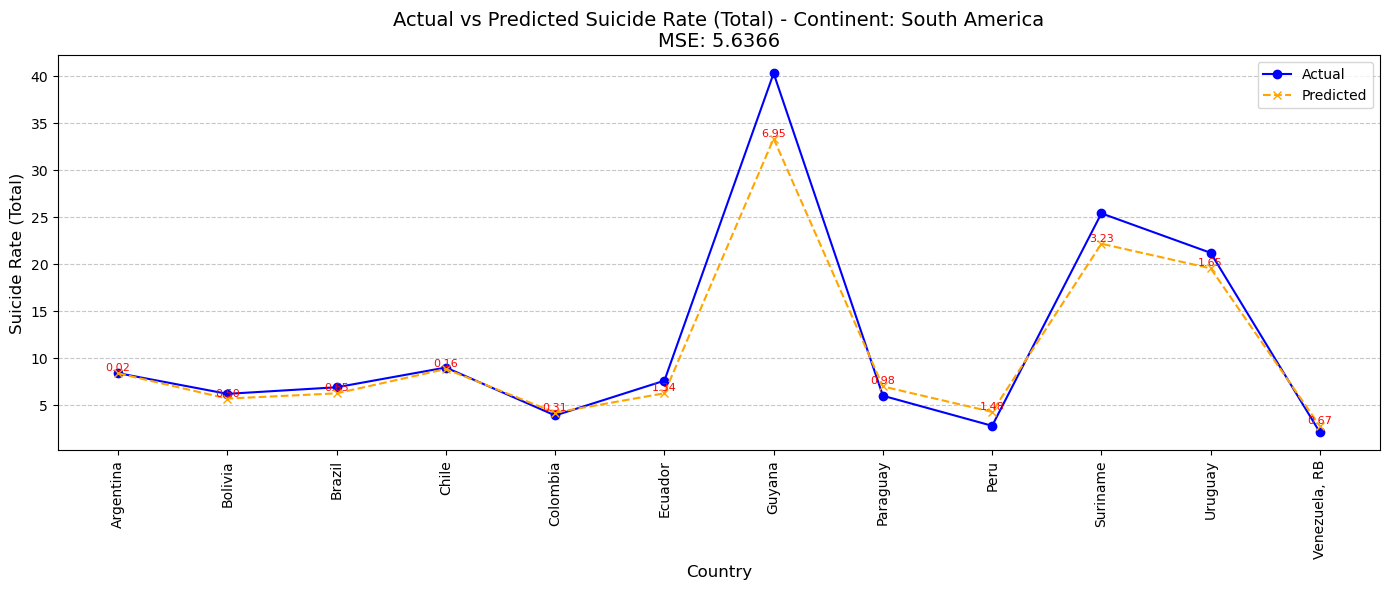

In [58]:
# Combine Actual, Predicted, and Country Names for the final results
test_data_results = test_data.copy()
test_data_results['Actual'] = y_test_final.values
test_data_results['Predicted'] = y_pred_final

# Loop through each continent to plot Actual vs Predicted values
for continent, group in test_data_results.groupby('Continent'):
    countries = group['Country Name'].values  # Country names for X-axis
    actual = group['Actual'].values
    predicted = group['Predicted'].values

    # Calculate MSE for the continent
    mse_continent = mean_squared_error(actual, predicted)

    plt.figure(figsize=(14, 6))

    # Plot Actual and Predicted values
    plt.plot(countries, actual, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(countries, predicted, label='Predicted', marker='x', linestyle='--', color='orange')

    # Add error annotations
    for i, (a, p) in enumerate(zip(actual, predicted)):
        error = abs(a - p)
        plt.text(i, p, f"{error:.2f}", ha='center', va='bottom', fontsize=8, color='red')

    # Plot configuration
    plt.title(f"Actual vs Predicted Suicide Rate (Total) - Continent: {continent}\nMSE: {mse_continent:.4f}", fontsize=14)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Suicide Rate (Total)", fontsize=12)
    plt.xticks(rotation=90)  # Rotate country names for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

This graphs shows the Actual and Predicted suicide rates for 2019. Each graph is sectioned by the countries on the x-axis and the suicide rates on the y-axis. The actual suicide rates are represented with blue lines and the predicted suicide rates are represented with orange dotted lines. The errors are represented with red above the data points.

Each graph title shows the continent and the general MS score. The results shows that the model performed best on predicting the suicide rates for the countries in Ocenia and North America. The model performed worse on predicting the suicide rates for the countries in South America. 

## Conclusion
To conclude, we based our research on data collected from the worldbank about suicide rates for every country from 2010 till 2019 along with socio-economic and political factors. We found that Lesotho, Eswatini and Guyana have the highest average suicide rate globally, with Europe dominating the top 30 countries, highlighting significant regional variations in suicide rates. We discovered that average suicide rates have been slowly decreasing both world wide and continent-wise as well - with the exception of South America and North America, with their rates rising or staying stagnant over the ten year period. When it comes to gender, we found a consistent disparity between the gender types with Males more likely to have higher average suicide rates within a region - with the highest disparities between male and female coming from the Europe region. We further looked at the economy of a country and how that might affect suicide rates globally. We considered factors like GDP per capita, literacy and unemployment rates. All in all, we discovered that the "richness" of a country has very little correlation with suicide rate outcomes — highlighting that economic success alone does not protect against high suicide rates and underscoring the complexity of mental health challenges influenced by cultural, social, political and psychological factors. We also investigated the correlation between suicide rates and socio-economic and political factors like political stability, government effectiveness, free speech etc. The strongest, but still weak, positive correlation we found with suicide rates was with political stability. 

Comment on: Limitations of our analysis and reliability of our answers.

Derive answers to the question from your analysis

Identify limitations of your analysis

How reliable are your answers?